In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fabric-defects-dataset/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/21_processed (3).jpg
/kaggle/input/fabric-defects-dataset/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/20.jpg
/kaggle/input/fabric-defects-dataset/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/6.jpg
/kaggle/input/fabric-defects-dataset/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/5_processed (3).jpg
/kaggle/input/fabric-defects-dataset/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/7_processed (1).jpg
/kaggle/input/fabric-defects-dataset/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/7_processed (2).jpg
/kaggle/input/fabric-defects-dataset/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/11_processed (3).jpg
/kaggle/input/fabric-defects-dataset/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/4_processed(3).jpg
/kaggle/input/fabric-defects-dataset/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/5.jpg
/kaggle/input/fabric-defects-dataset/Fabr

In [2]:
from sklearn.manifold import TSNE

def plot_tsne(model, file_paths, labels):
    """
    Extracts features from the trained model and visualizes them using T-SNE.
    """
    # Load and preprocess images
    images = np.array([
        tf.keras.utils.img_to_array(tf.keras.utils.load_img(f, target_size=img_size))
        for f in file_paths
    ]) / 255.0
    
    # Get feature representations from the Global Average Pooling layer
    feature_extractor = Model(inputs=model.input, outputs=model.get_layer(index=-4).output)
    features = feature_extractor.predict(images)

    # Apply T-SNE for dimensionality reduction
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    tsne_results = tsne.fit_transform(features)

    # Scatter plot
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='jet', alpha=0.7)
    plt.colorbar(scatter, ticks=range(num_classes))
    plt.title('T-SNE Visualization of Fabric Defect Features')
    plt.xlabel('T-SNE Component 1')
    plt.ylabel('T-SNE Component 2')
    plt.show()



Training Fold 1...
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 121s 222ms/step - accuracy: 0.3618 - loss: 1.7810 - val_accuracy: 0.1545 - val_loss: 1.9765
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.7015 - loss: 0.8227 - val_accuracy: 0.3920 - val_loss: 1.5354
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.7712 - loss: 0.6141 - val_accuracy: 0.7090 - val_loss: 0.7267
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.7935 - loss: 0.5390 - val_accuracy: 0.8605 - val_loss: 0.4339
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.8133 - loss: 0.4725 - val_accuracy: 0.8725 - val_loss: 0.3784
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.8173 - loss: 0.4679 - val_accuracy: 0.8765 - val_loss: 0.3763
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.8342 - loss: 0.4138 - val_accuracy: 0.8905 - val_loss: 0.3372
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.8474 - loss: 0.4032 - val_accur

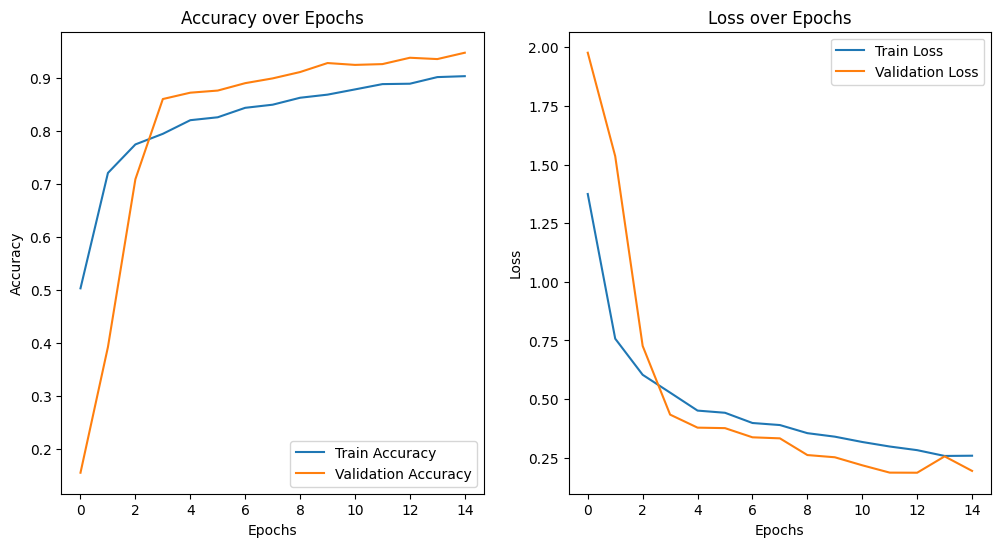

63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.9462 - loss: 0.2308
Fold 1 - Test Accuracy: 0.9435, Test Loss: 0.2223
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step


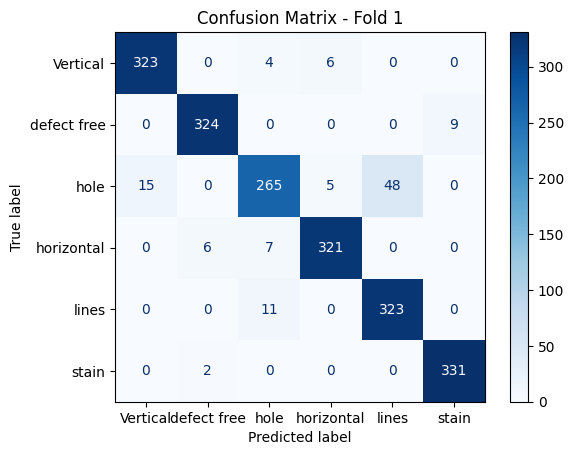

Test Set Classification Report:
              precision    recall  f1-score   support

    Vertical       0.96      0.97      0.96       333
 defect free       0.98      0.97      0.97       333
        hole       0.92      0.80      0.85       333
  horizontal       0.97      0.96      0.96       334
       lines       0.87      0.97      0.92       334
       stain       0.97      0.99      0.98       333

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



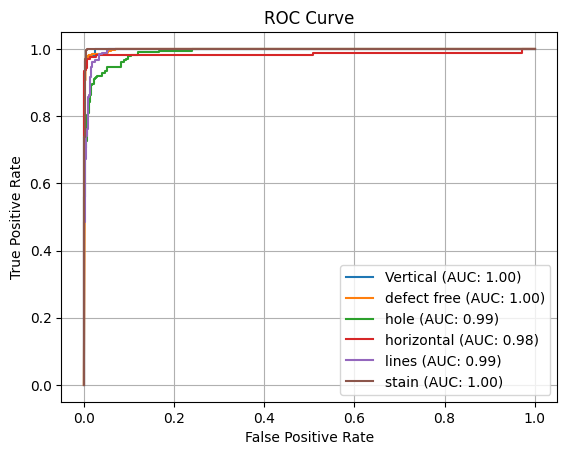

Generating T-SNE for Fold 1...
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step


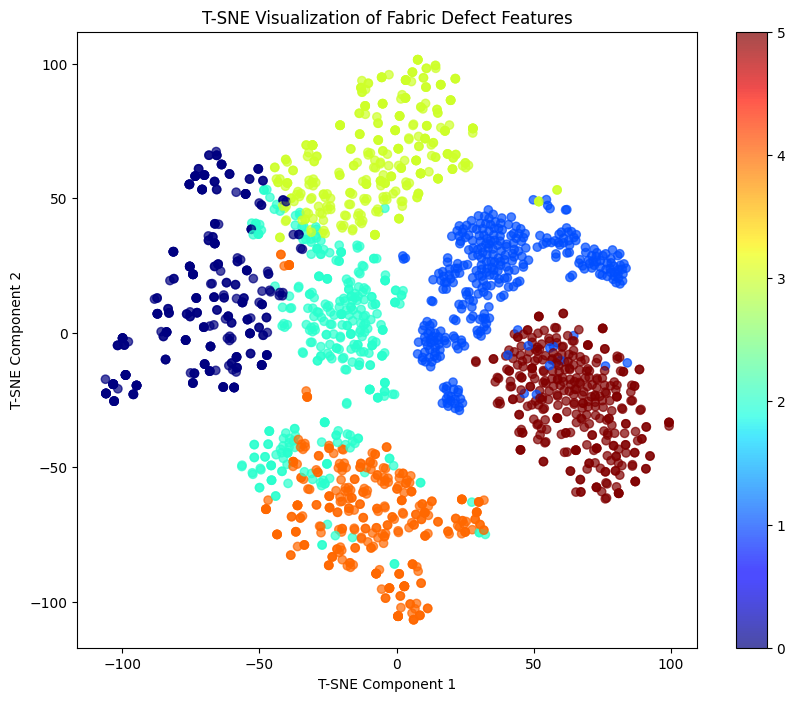


Training Fold 2...
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 115s 227ms/step - accuracy: 0.3811 - loss: 1.7295 - val_accuracy: 0.1876 - val_loss: 1.8984
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.7119 - loss: 0.7877 - val_accuracy: 0.3397 - val_loss: 1.5998
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.7624 - loss: 0.6253 - val_accuracy: 0.6318 - val_loss: 0.8971
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.8066 - loss: 0.4965 - val_accuracy: 0.8404 - val_loss: 0.4054
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.8135 - loss: 0.4734 - val_accuracy: 0.8774 - val_loss: 0.3383
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.8353 - loss: 0.4133 - val_accuracy: 0.8894 - val_loss: 0.2776
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - accuracy: 0.8473 - loss: 0.4059 - val_accuracy: 0.8954 - val_loss: 0.2984
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.8523 - loss: 0.3716 - val_accur

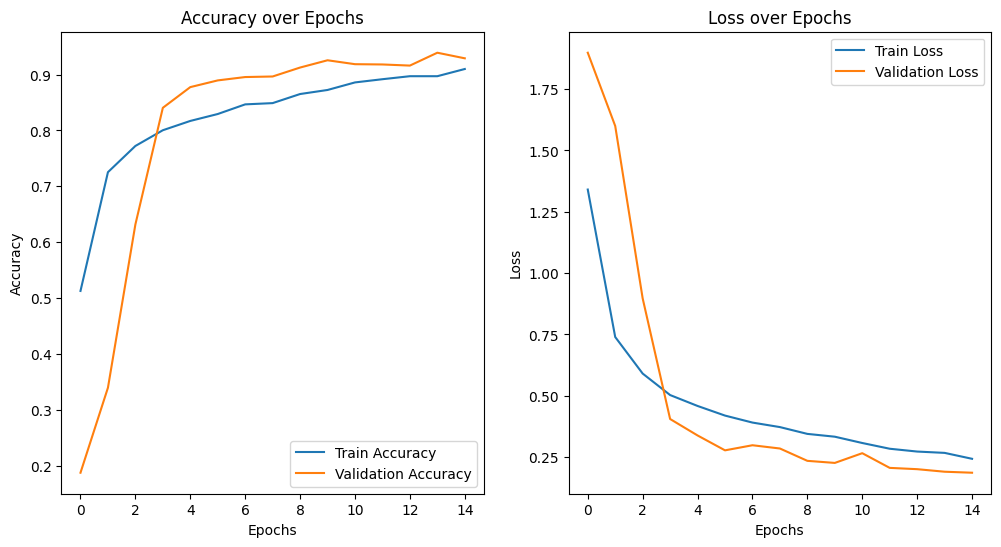

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.9411 - loss: 0.1732
Fold 2 - Test Accuracy: 0.9405, Test Loss: 0.1642
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step


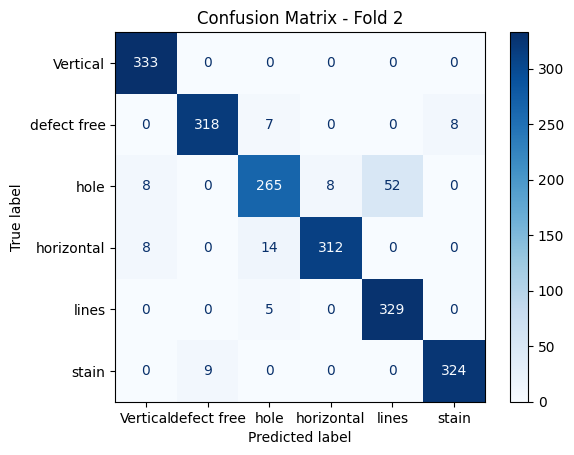

Test Set Classification Report:
              precision    recall  f1-score   support

    Vertical       0.95      1.00      0.98       333
 defect free       0.97      0.95      0.96       333
        hole       0.91      0.80      0.85       333
  horizontal       0.97      0.93      0.95       334
       lines       0.86      0.99      0.92       334
       stain       0.98      0.97      0.97       333

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



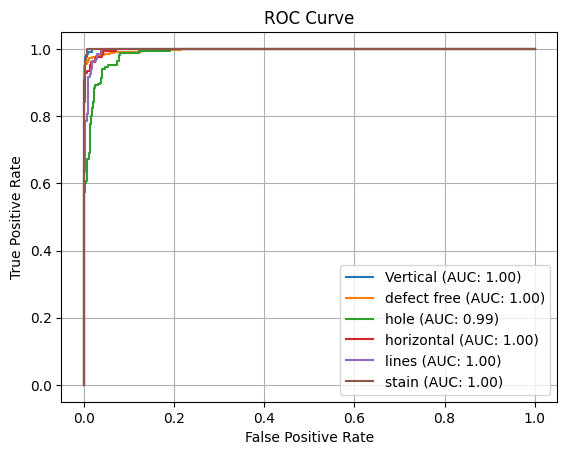

Generating T-SNE for Fold 2...
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step


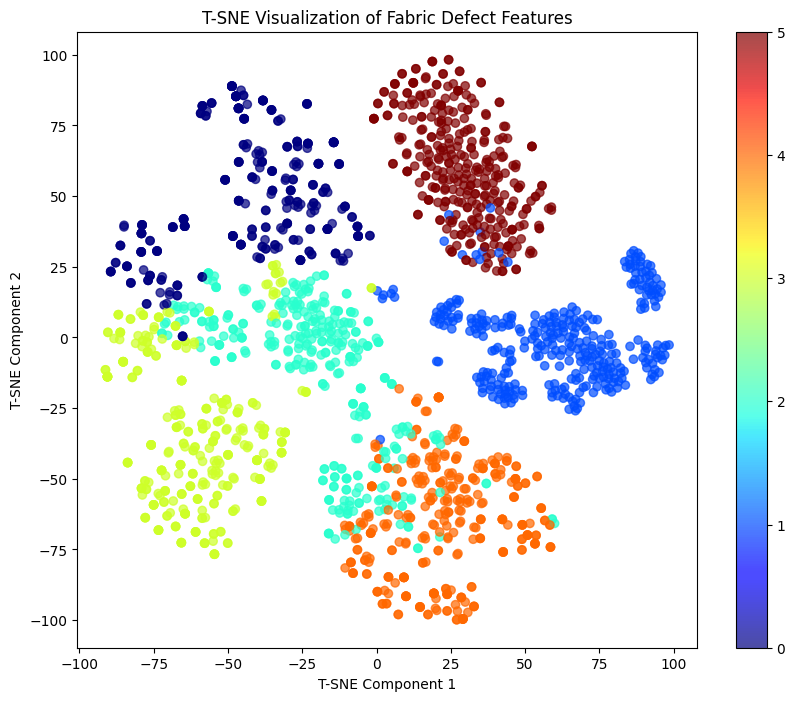


Training Fold 3...
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 103s 184ms/step - accuracy: 0.3882 - loss: 1.6770 - val_accuracy: 0.1636 - val_loss: 1.8987
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.7024 - loss: 0.7964 - val_accuracy: 0.3977 - val_loss: 1.5911
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.7637 - loss: 0.6186 - val_accuracy: 0.7054 - val_loss: 0.7796
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.7917 - loss: 0.5537 - val_accuracy: 0.8649 - val_loss: 0.4573
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.8044 - loss: 0.4811 - val_accuracy: 0.8834 - val_loss: 0.4270
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.8222 - loss: 0.4348 - val_accuracy: 0.9060 - val_loss: 0.3033
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.8424 - loss: 0.3993 - val_accuracy: 0.9075 - val_loss: 0.4195
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.8478 - loss: 0.3773 - val_accur

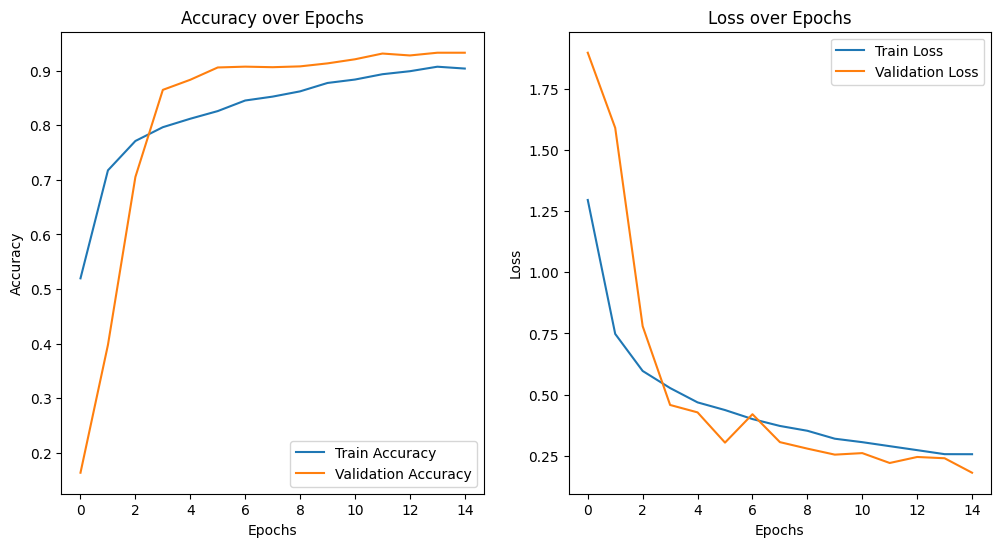

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.9524 - loss: 0.1390
Fold 3 - Test Accuracy: 0.9495, Test Loss: 0.1410
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step


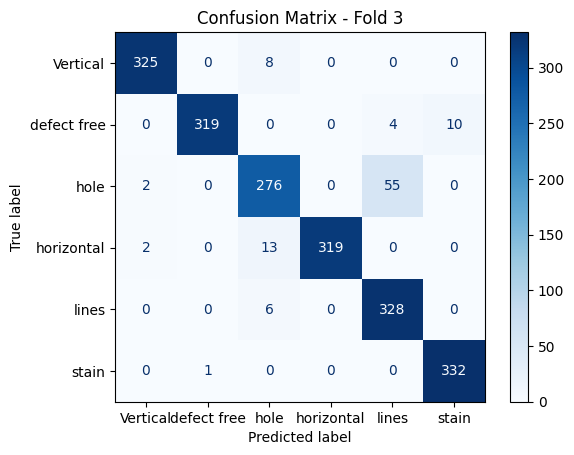

Test Set Classification Report:
              precision    recall  f1-score   support

    Vertical       0.99      0.98      0.98       333
 defect free       1.00      0.96      0.98       333
        hole       0.91      0.83      0.87       333
  horizontal       1.00      0.96      0.98       334
       lines       0.85      0.98      0.91       334
       stain       0.97      1.00      0.98       333

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



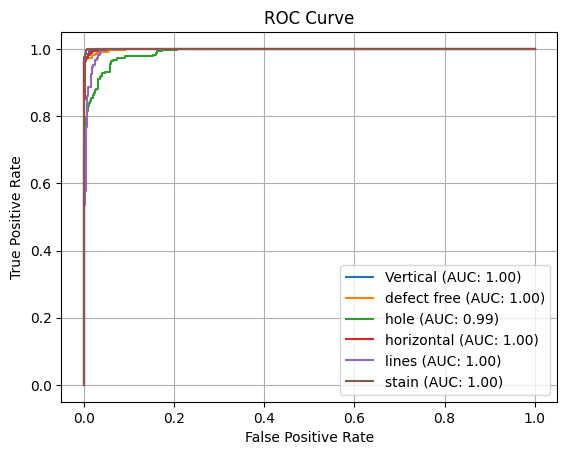

Generating T-SNE for Fold 3...
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step


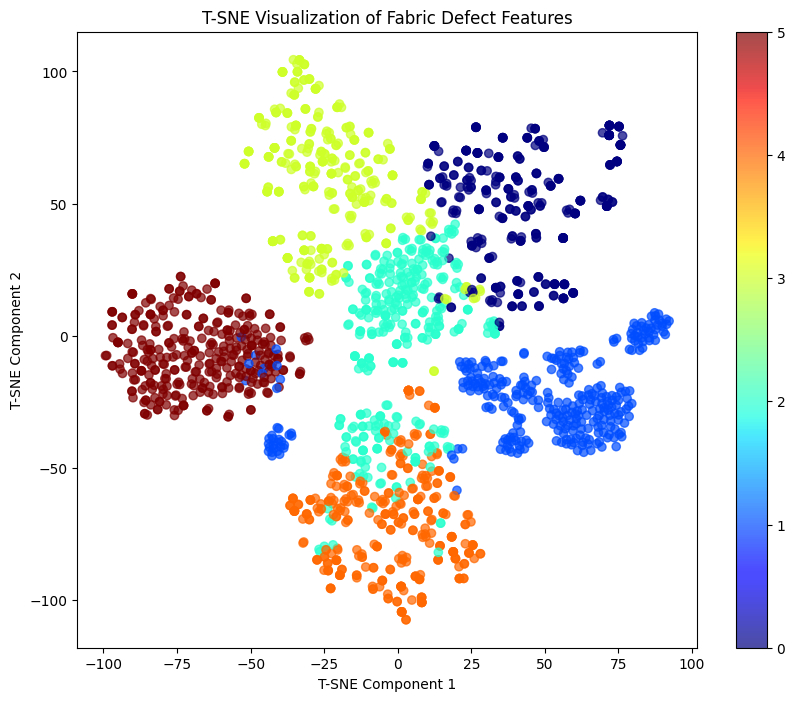


Training Fold 4...
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 104s 185ms/step - accuracy: 0.3707 - loss: 1.7114 - val_accuracy: 0.1721 - val_loss: 2.0065
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.6944 - loss: 0.8222 - val_accuracy: 0.4162 - val_loss: 1.5306
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.7685 - loss: 0.6092 - val_accuracy: 0.7049 - val_loss: 0.7260
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.7954 - loss: 0.5344 - val_accuracy: 0.8454 - val_loss: 0.4360
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - accuracy: 0.8093 - loss: 0.4915 - val_accuracy: 0.8814 - val_loss: 0.3876
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.8215 - loss: 0.4563 - val_accuracy: 0.9020 - val_loss: 0.3104
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - accuracy: 0.8397 - loss: 0.4035 - val_accuracy: 0.9060 - val_loss: 0.2703
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.8472 - loss: 0.3741 - val_accur

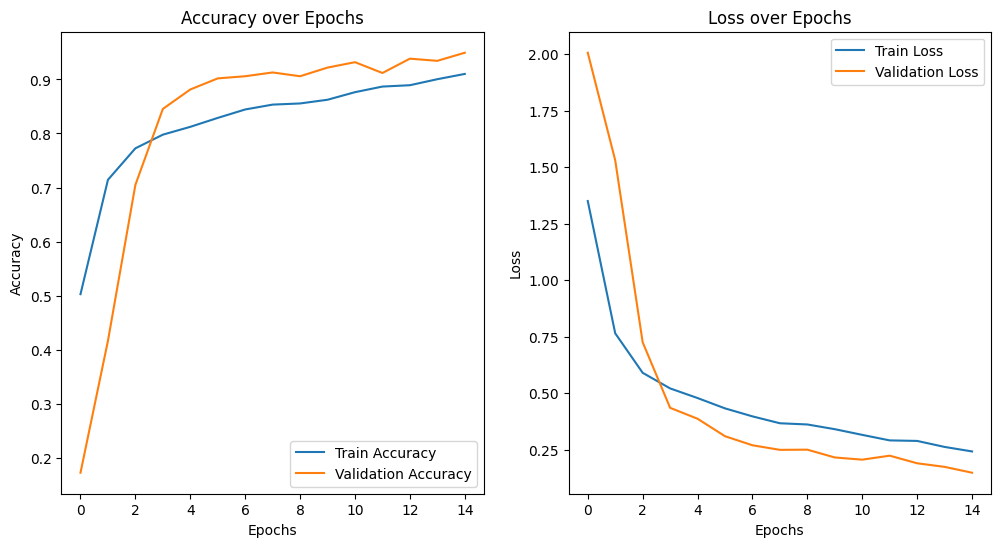

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.9518 - loss: 0.1366
Fold 4 - Test Accuracy: 0.9505, Test Loss: 0.1358
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step


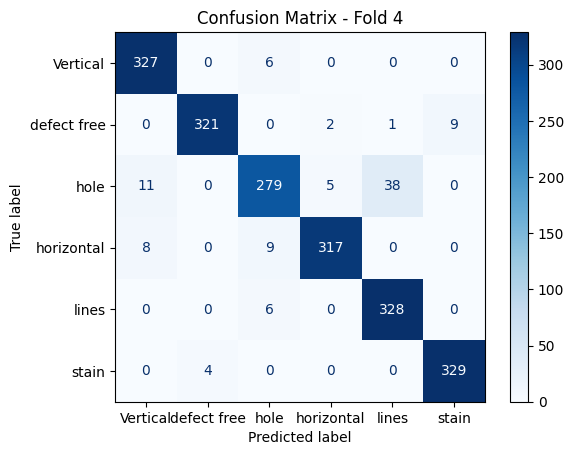

Test Set Classification Report:
              precision    recall  f1-score   support

    Vertical       0.95      0.98      0.96       333
 defect free       0.99      0.96      0.98       333
        hole       0.93      0.84      0.88       333
  horizontal       0.98      0.95      0.96       334
       lines       0.89      0.98      0.94       334
       stain       0.97      0.99      0.98       333

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



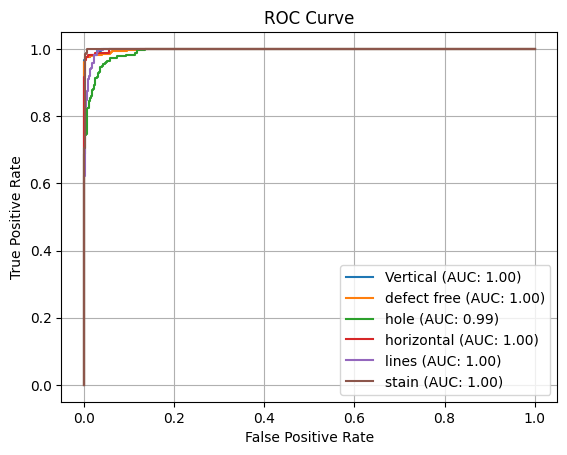

Generating T-SNE for Fold 4...
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step


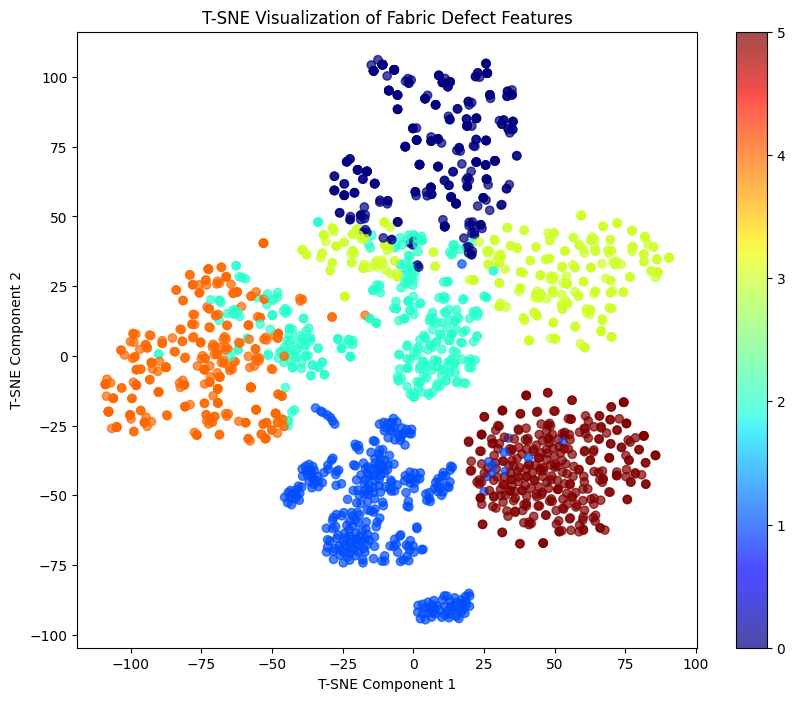


Training Fold 5...
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 102s 183ms/step - accuracy: 0.3492 - loss: 1.7675 - val_accuracy: 0.1506 - val_loss: 1.8316
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.6982 - loss: 0.8142 - val_accuracy: 0.3357 - val_loss: 1.6691
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.7645 - loss: 0.6042 - val_accuracy: 0.7089 - val_loss: 0.6830
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.8030 - loss: 0.5225 - val_accuracy: 0.8649 - val_loss: 0.3530
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.8127 - loss: 0.4733 - val_accuracy: 0.8824 - val_loss: 0.3535
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.8260 - loss: 0.4357 - val_accuracy: 0.8949 - val_loss: 0.2998
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.8392 - loss: 0.4086 - val_accuracy: 0.9060 - val_loss: 0.2880
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.8529 - loss: 0.3748 - val_accur

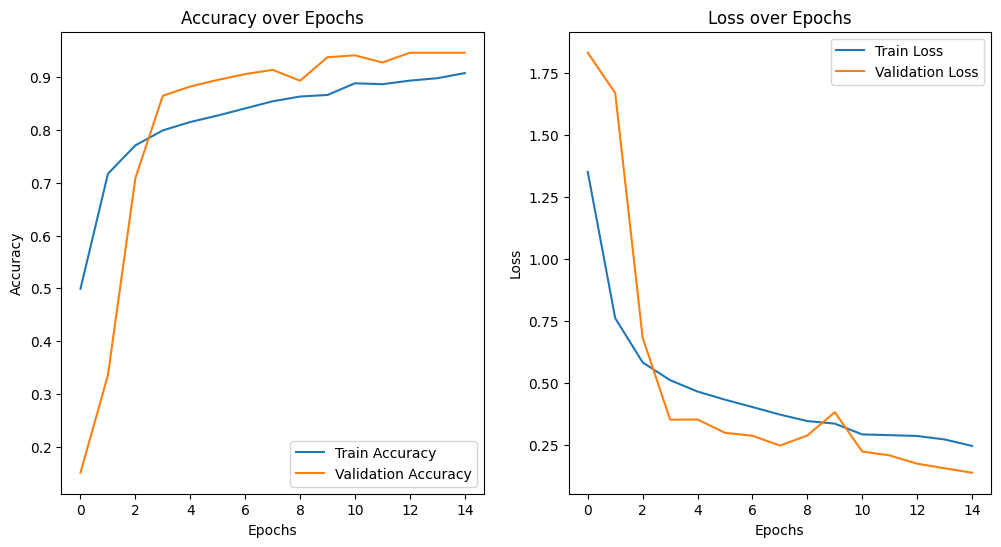

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.9413 - loss: 0.1504
Fold 5 - Test Accuracy: 0.9405, Test Loss: 0.1468
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step


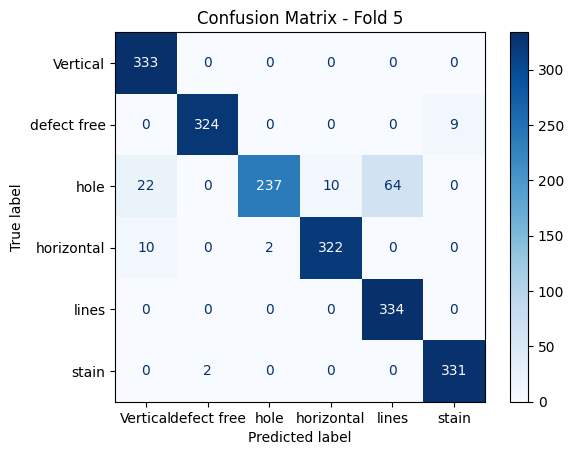

Test Set Classification Report:
              precision    recall  f1-score   support

    Vertical       0.91      1.00      0.95       333
 defect free       0.99      0.97      0.98       333
        hole       0.99      0.71      0.83       333
  horizontal       0.97      0.96      0.97       334
       lines       0.84      1.00      0.91       334
       stain       0.97      0.99      0.98       333

    accuracy                           0.94      2000
   macro avg       0.95      0.94      0.94      2000
weighted avg       0.95      0.94      0.94      2000



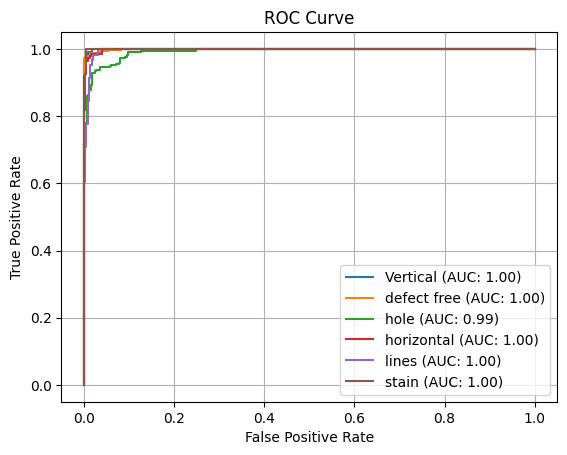

Generating T-SNE for Fold 5...
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step


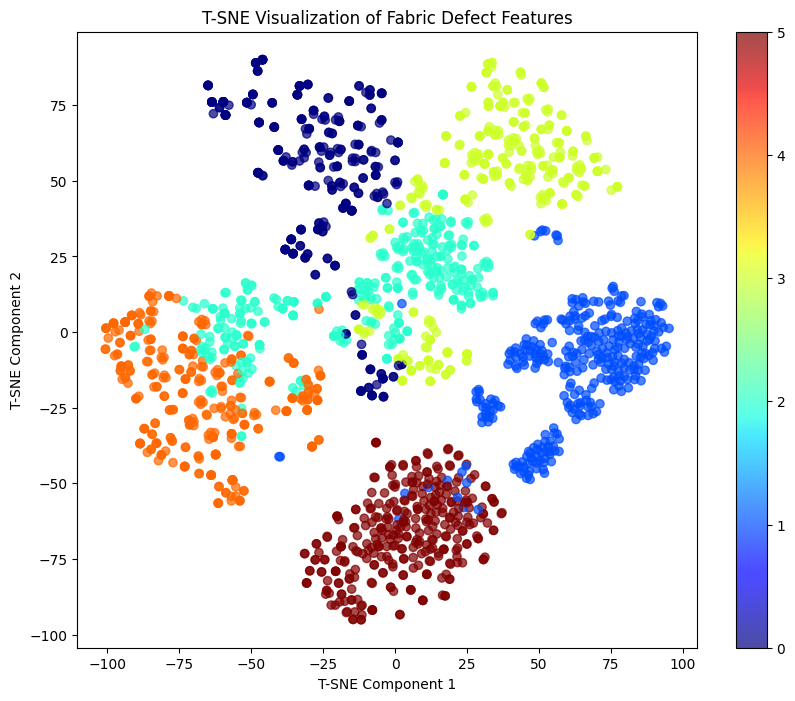

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

data_dir = '/kaggle/input/fabric-defects-dataset/Fabric Defects Dataset/Fabric Defect Dataset/'
img_size = (64, 64)
batch_size = 32
class_names = ['Vertical', 'defect free', 'hole', 'horizontal', 'lines', 'stain']  # Updated with 6 classes
num_classes = len(class_names)

def build_efficientnet():
    base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(64, 64, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

def load_data(data_dir):
    file_paths, labels = [], []
    for class_index, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_dir):
            file_paths.append(os.path.join(class_dir, filename))
            labels.append(class_index)

    file_paths = np.array(file_paths)
    labels = np.array(labels)

    # Apply oversampling
    ros = RandomOverSampler(sampling_strategy='not majority', random_state=42)
    file_paths, labels = ros.fit_resample(file_paths.reshape(-1, 1), labels)
    return file_paths.flatten(), labels

def create_data_generator(file_paths, labels, is_training=True):
    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    ) if is_training else ImageDataGenerator(rescale=1./255)

    file_paths = np.array(file_paths)
    labels = np.array(labels)

    generator = datagen.flow(
        x=np.array([
            tf.keras.utils.img_to_array(
                tf.keras.utils.load_img(f, target_size=img_size)
            ) for f in file_paths
        ]),
        y=tf.keras.utils.to_categorical(labels, num_classes=num_classes),
        batch_size=batch_size,
        shuffle=is_training
    )
    return generator

def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

def plot_roc_curve(y_true, y_pred, class_labels):
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC: {roc_auc:.2f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

def train_and_evaluate_with_kfold(file_paths, labels, test_files, test_labels):
    fold_num = 1
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, val_index in skf.split(file_paths, labels):
        print(f"\nTraining Fold {fold_num}...")

        train_files, val_files = file_paths[train_index], file_paths[val_index]
        train_labels, val_labels = labels[train_index], labels[val_index]

        train_generator = create_data_generator(train_files, train_labels, is_training=True)
        val_generator = create_data_generator(val_files, val_labels, is_training=False)

        class_weights = compute_class_weight(
            class_weight='balanced',
            classes=np.unique(train_labels),
            y=train_labels
        )
        class_weights_dict = dict(enumerate(class_weights))

        model = build_efficientnet()
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

        history = model.fit(
            train_generator,
            validation_data=val_generator,
            epochs=15,
            class_weight=class_weights_dict,
            callbacks=[early_stopping]
        )

        plot_training_history(history)

        test_images = np.array([
            tf.keras.utils.img_to_array(tf.keras.utils.load_img(f, target_size=img_size))
            for f in test_files
        ]) / 255.0
        test_labels_one_hot = tf.keras.utils.to_categorical(test_labels, num_classes=num_classes)

        test_loss, test_accuracy = model.evaluate(test_images, test_labels_one_hot, verbose=1)
        print(f"Fold {fold_num} - Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

        predictions = model.predict(test_images)
        predicted_classes = np.argmax(predictions, axis=1)

        cm = confusion_matrix(test_labels, predicted_classes)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
        disp.plot(cmap='Blues')
        plt.title(f'Confusion Matrix - Fold {fold_num}')
        plt.show()

        print("Test Set Classification Report:")
        print(classification_report(test_labels, predicted_classes, target_names=class_names))

        plot_roc_curve(test_labels_one_hot, predictions, class_names)

        print(f"Generating T-SNE for Fold {fold_num}...")
        plot_tsne(model, test_files, test_labels)


        fold_num += 1

file_paths, labels = load_data(data_dir)
train_files, test_files, train_labels, test_labels = train_test_split(
    file_paths, labels, test_size=0.2, stratify=labels, random_state=42
)
train_and_evaluate_with_kfold(file_paths, labels, test_files, test_labels)
